## Бриф

Компания "Мегалайн" предлагает своим клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше, для этого нужно:
* при необходимости исправить ошибки в данных и привести их к нужным типам
* посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя (вычтитанием бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана; прибавляем абонентскую плату, соответствующую тарифному плану)
* описать поведение клиентов оператора, исходя из выборки:
    - сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
    - посчитать среднее количество, дисперсию и стандартное отклонение
    - построить гистограммы, описать распределения
    
* проверить нулевые гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова
    - средняя выручка пользователей из Москвы аналогична выручке пользователей из других регионов
* сделать вывод

## Первый взгляд на данные

Посмотрим на данные всех имеющихся у нас датасетов:

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [117]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

display(users, calls, messages, internet, tariffs)
display(users.info(), calls.info(), messages.info(), internet.info(), tariffs.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
<class 'pandas.core.frame.D

None

None

None

None

None

В целом, после первого взгляда на данные можно сказать, что они выглядят хорошо структурированными и достаточно полными - нет ни текста с разным регистром, ни обилия пропусков в разных столбцах. Однако, кое-что все же требуется поправить.

## Обработка данных

Сменим даты на формат datetime, а также округлим в большую сторону израсходованные минуты и мегабайты интернета - поскольку Мегалайн всегда округляет секунды до минут, а мегабайты — до гигабайт:

In [118]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['duration'] = np.ceil(calls['duration'].copy()).astype('int')

def gb_used (value):
    if value == 0:
        return 0
    elif value <= 1024:
        return 1
    return 2

internet['gb_used'] = internet['mb_used'].copy().apply(gb_used)
display(calls, internet)
internet.info()

,id,call_date,duration,user_id
0,1000_0,2018-05-25,0,1000
1,1000_1,2018-11-01,0,1000
2,1000_2,2018-06-17,3,1000
3,1000_3,2018-08-17,14,1000
4,1000_4,2018-05-14,6,1000
...,...,...,...,...
202602,1499_215,NaT,1,1499
202603,1499_216,NaT,19,1499
202604,1499_217,NaT,11,1499
202605,1499_218,NaT,5,1499


,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,112.95,2018-05-25,1000,1
1,1,1000_1,1052.81,2018-11-01,1000,2
2,2,1000_2,1197.26,2018-06-17,1000,2
3,3,1000_3,550.27,2018-08-17,1000,1
4,4,1000_4,302.56,2018-05-14,1000,1
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,NaT,1499,1
149392,149392,1499_153,490.13,NaT,1499,1
149393,149393,1499_154,0.00,NaT,1499,0
149394,149394,1499_155,1246.32,NaT,1499,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  500 non-null     datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   gb_used       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


Итак, посмотрев на представленные датафреймы и информацию о них, можно увидеть значительное количество пропусков в столбце churn_date датафрейма users - а значит, на момент выгрузки данных подавляющее большинство пользователей не совершали смены тарифа. Можно предположить, что люди, не сменившие тариф были им довольны, а сменивших, напротив, тариф не устраивал, и процент таких клиентов составляет 7,6% от общего числа в выборке, что позволяет заключить, что, в целом, пользователей устраивают их тарифы. Посмотрим, какой тариф пользуется большей популярностью:

In [119]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Около 70% пользователей предпочитают Смарт!

## Группировка данных за месяц

In [120]:
users_city = users[['user_id', 'city']]
users_city

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк
...,...,...
495,1495,Иркутск
496,1496,Вологда
497,1497,Челябинск
498,1498,Владикавказ


In [121]:
users_tariffs = users[['user_id', 'tariff']]
users_tariffs

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
...,...,...
495,1495,ultra
496,1496,smart
497,1497,smart
498,1498,smart


Поскольку, в условии сказанно, что нам предоставленны данные о выборке пользователей за год, то скомпануем все интересующие нас значения в одну таблицу, а затем найдем средние месячные значения для каждого пользователя - на мой взгляд, этот способ должен более адекватно отражать усредненные значения по расходу траффика пользователей, нежели сревнение показателей случайно взятого отдельного месяца.

In [122]:
internet_year = pd.pivot_table(internet, index = 'user_id', values = 'gb_used', aggfunc = 'sum')
display(internet_year)
internet_year['gb_used'].mean()

,gb_used
user_id,
1000,208
1001,82
1002,299
1003,106
1004,291
...,...
1495,252
1496,696
1497,106


265.8792756539235

In [123]:
minutes_year = pd.pivot_table(calls, index = 'user_id', values = 'duration', aggfunc = 'sum')
minutes_year

,duration
user_id,
1000,2566
1001,844
1002,1517
1003,3822
1004,987
...,...
1495,3920
1496,5984
1497,1406


In [124]:
messages_year = pd.pivot_table(messages, index = 'user_id', values = 'id', aggfunc = 'count')
messages_year

,id
user_id,
1000,496
1002,70
1003,380
1004,1192
1005,552
...,...
1495,340
1496,468
1497,51


In [125]:
users_year = internet_year.merge(minutes_year, on = 'user_id', how = 'left')
users_year = users_year.copy().merge(messages_year, on = 'user_id', how = 'left')
users_year = users_year.copy().merge(users_tariffs, on = 'user_id', how = 'left')
users_year = users_year.copy().merge(users_city, on = 'user_id', how = 'left')
users_year.columns = ['user_id', 'gb_used', 'minutes_used', 'messages', 'tariff', 'city']
users_year

,user_id,gb_used,minutes_used,messages,tariff,city
0,1000,208,2566.0,496.0,ultra,Краснодар
1,1001,82,844.0,NaN,smart,Москва
2,1002,299,1517.0,70.0,smart,Стерлитамак
3,1003,106,3822.0,380.0,ultra,Москва
4,1004,291,987.0,1192.0,ultra,Новокузнецк
...,...,...,...,...,...,...
492,1495,252,3920.0,340.0,ultra,Иркутск
493,1496,696,5984.0,468.0,smart,Вологда
494,1497,106,1406.0,51.0,smart,Челябинск
495,1498,192,1293.0,168.0,smart,Владикавказ


In [126]:
smart_year = users_year.query('tariff == "smart"')
ultra_year = users_year.query('tariff == "ultra"')
display(smart_year)
ultra_year

,user_id,gb_used,minutes_used,messages,tariff,city
1,1001,82,844.0,NaN,smart,Москва
2,1002,299,1517.0,70.0,smart,Стерлитамак
5,1005,252,6605.0,552.0,smart,Набережные Челны
6,1006,412,3501.0,NaN,smart,Ульяновск
7,1007,355,4379.0,225.0,smart,Москва
...,...,...,...,...,...,...
491,1494,209,1946.0,NaN,smart,Омск
493,1496,696,5984.0,468.0,smart,Вологда
494,1497,106,1406.0,51.0,smart,Челябинск
495,1498,192,1293.0,168.0,smart,Владикавказ


,user_id,gb_used,minutes_used,messages,tariff,city
0,1000,208,2566.0,496.0,ultra,Краснодар
3,1003,106,3822.0,380.0,ultra,Москва
4,1004,291,987.0,1192.0,ultra,Новокузнецк
13,1013,59,936.0,42.0,ultra,Иваново
16,1016,47,122.0,142.0,ultra,Омск
...,...,...,...,...,...,...
473,1476,303,4204.0,45.0,ultra,Москва
482,1485,49,584.0,155.0,ultra,Киров
488,1491,311,4620.0,432.0,ultra,Челябинск
490,1493,104,744.0,94.0,ultra,Красноярск


In [127]:
columns_to_fill = ['gb_used', 'minutes_used', 'messages']
for column in columns_to_fill:
    smart_year[column] = smart_year[column].copy().fillna(smart_year[column].copy().median()).astype('int')
for column in columns_to_fill:
    ultra_year[column] = ultra_year[column].copy().fillna(ultra_year[column].copy().median()).astype('int')
    
display(smart_year)
ultra_year

/tmp/ipykernel_113/4117427078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_year[column] = smart_year[column].copy().fillna(smart_year[column].copy().median()).astype('int')
/tmp/ipykernel_113/4117427078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smart_year[column] = smart_year[column].copy().fillna(smart_year[column].copy().median()).astype('int')
/tmp/ipykernel_113/4117427078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,user_id,gb_used,minutes_used,messages,tariff,city
1,1001,82,844,180,smart,Москва
2,1002,299,1517,70,smart,Стерлитамак
5,1005,252,6605,552,smart,Набережные Челны
6,1006,412,3501,180,smart,Ульяновск
7,1007,355,4379,225,smart,Москва
...,...,...,...,...,...,...
491,1494,209,1946,180,smart,Омск
493,1496,696,5984,468,smart,Вологда
494,1497,106,1406,51,smart,Челябинск
495,1498,192,1293,168,smart,Владикавказ


,user_id,gb_used,minutes_used,messages,tariff,city
0,1000,208,2566,496,ultra,Краснодар
3,1003,106,3822,380,ultra,Москва
4,1004,291,987,1192,ultra,Новокузнецк
13,1013,59,936,42,ultra,Иваново
16,1016,47,122,142,ultra,Омск
...,...,...,...,...,...,...
473,1476,303,4204,45,ultra,Москва
482,1485,49,584,155,ultra,Киров
488,1491,311,4620,432,ultra,Челябинск
490,1493,104,744,94,ultra,Красноярск


In [128]:
smart_mnth = smart_year.copy()
columns_to_div = ['gb_used', 'minutes_used', 'messages']
for column in columns_to_div:
    smart_mnth[column] = round(smart_mnth[column]/12)

ultra_mnth = ultra_year.copy()
columns_to_div = ['gb_used', 'minutes_used', 'messages']
for column in columns_to_div:
    ultra_mnth[column] = round(ultra_mnth[column]/12)
    
display(smart_mnth)    
ultra_mnth

,user_id,gb_used,minutes_used,messages,tariff,city
1,1001,7.0,70.0,15.0,smart,Москва
2,1002,25.0,126.0,6.0,smart,Стерлитамак
5,1005,21.0,550.0,46.0,smart,Набережные Челны
6,1006,34.0,292.0,15.0,smart,Ульяновск
7,1007,30.0,365.0,19.0,smart,Москва
...,...,...,...,...,...,...
491,1494,17.0,162.0,15.0,smart,Омск
493,1496,58.0,499.0,39.0,smart,Вологда
494,1497,9.0,117.0,4.0,smart,Челябинск
495,1498,16.0,108.0,14.0,smart,Владикавказ


,user_id,gb_used,minutes_used,messages,tariff,city
0,1000,17.0,214.0,41.0,ultra,Краснодар
3,1003,9.0,318.0,32.0,ultra,Москва
4,1004,24.0,82.0,99.0,ultra,Новокузнецк
13,1013,5.0,78.0,4.0,ultra,Иваново
16,1016,4.0,10.0,12.0,ultra,Омск
...,...,...,...,...,...,...
473,1476,25.0,350.0,4.0,ultra,Москва
482,1485,4.0,49.0,13.0,ultra,Киров
488,1491,26.0,385.0,36.0,ultra,Челябинск
490,1493,9.0,62.0,8.0,ultra,Красноярск


## Рассчет пользовательских платежей

Рассчитаем сумму, которую абонент платит в месяц - вычтем показатели тарифного плана из фактических показателей, остаток умножим на сумму, предусмотренную в тарифе после превышения лимита:

In [129]:
smart_mnth['payment'] = (((smart_mnth['minutes_used'] - 500).clip(lower=0)) * 3) + (((smart_mnth['gb_used'] - 15).clip(lower=0)) * 200) + (((smart_mnth['messages'] - 50).clip(lower=0)) * 3) + 550
smart_mnth

,user_id,gb_used,minutes_used,messages,tariff,city,payment
1,1001,7.0,70.0,15.0,smart,Москва,550.0
2,1002,25.0,126.0,6.0,smart,Стерлитамак,2550.0
5,1005,21.0,550.0,46.0,smart,Набережные Челны,1900.0
6,1006,34.0,292.0,15.0,smart,Ульяновск,4350.0
7,1007,30.0,365.0,19.0,smart,Москва,3550.0
...,...,...,...,...,...,...,...
491,1494,17.0,162.0,15.0,smart,Омск,950.0
493,1496,58.0,499.0,39.0,smart,Вологда,9150.0
494,1497,9.0,117.0,4.0,smart,Челябинск,550.0
495,1498,16.0,108.0,14.0,smart,Владикавказ,750.0


In [130]:
smart_mnth['payment'].median()

1750.0

In [131]:
ultra_mnth['payment'] = (((ultra_mnth['minutes_used'] - 3000).clip(lower=0)) * 1) + (((ultra_mnth['gb_used'] - 30).clip(lower=0)) * 150) + (((ultra_mnth['messages'] - 1000).clip(lower=0)) * 1) + 1950
ultra_mnth

,user_id,gb_used,minutes_used,messages,tariff,city,payment
0,1000,17.0,214.0,41.0,ultra,Краснодар,1950.0
3,1003,9.0,318.0,32.0,ultra,Москва,1950.0
4,1004,24.0,82.0,99.0,ultra,Новокузнецк,1950.0
13,1013,5.0,78.0,4.0,ultra,Иваново,1950.0
16,1016,4.0,10.0,12.0,ultra,Омск,1950.0
...,...,...,...,...,...,...,...
473,1476,25.0,350.0,4.0,ultra,Москва,1950.0
482,1485,4.0,49.0,13.0,ultra,Киров,1950.0
488,1491,26.0,385.0,36.0,ultra,Челябинск,1950.0
490,1493,9.0,62.0,8.0,ultra,Красноярск,1950.0


In [132]:
ultra_mnth['payment'].median()

1950.0

### Вывод

Интересно то, что потребности пользователей тарифа Смарт зачастую сильно превышают лимиты - и абоненты вынуждены переплачивать, отдавая сумму, которая, в среднем, примерно в три раза больше платы за сам тариф. Однако, данная сумма (1780) все равно меньше платы за тариф Ультра (1950) - и, видимо, этим и мотивировано желание абонентов оставаться на Смарте.

## Статистические рассчеты

### Среднее, дисперсия и стандартное отклонение

In [133]:
smart_internet_mean = smart_mnth['gb_used'].mean()
smart_minutes_mean = smart_mnth['minutes_used'].mean()
smart_messages_mean = smart_mnth['messages'].mean()
display('Средние показатели по тарифу Smart:', 'Интернет', smart_internet_mean, 'Звонки', smart_minutes_mean, 'Сообщения', smart_messages_mean)

ultra_internet_mean = ultra_mnth['gb_used'].mean()
ultra_minutes_mean = ultra_mnth['minutes_used'].mean()
ultra_messages_mean = ultra_mnth['messages'].mean()
display('Средние показатели по тарифу Ultra:', 'Интернет', ultra_internet_mean, 'Звонки', ultra_minutes_mean, 'Сообщения', ultra_messages_mean)

'Средние показатели по тарифу Smart:'

'Интернет'

22.542857142857144

'Звонки'

222.36285714285714

'Сообщения'

19.78

'Средние показатели по тарифу Ultra:'

'Интернет'

21.292517006802722

'Звонки'

302.13605442176873

'Сообщения'

31.496598639455783

In [134]:
display('Smart:',
    smart_mnth.pivot_table(index= 'tariff', values= 'gb_used', aggfunc= ['mean', 'var','std']),
    smart_mnth.pivot_table(index= 'tariff', values= 'minutes_used', aggfunc= ['mean', 'var','std']),
    smart_mnth.pivot_table(index= 'tariff', values= 'messages', aggfunc= ['mean', 'var','std'])
)

'Smart:'

,mean,var,std
,gb_used,gb_used,gb_used
tariff,,,
smart,22.542857,171.675808,13.102512


,mean,var,std
,minutes_used,minutes_used,minutes_used
tariff,,,
smart,222.362857,21075.544175,145.174186


,mean,var,std
,messages,messages,messages
tariff,,,
smart,19.78,300.137708,17.324483


In [135]:
smart_internet_deviation = np.std(smart_mnth['gb_used'], ddof=1)
smart_minutes_deviation = np.std(smart_mnth['minutes_used'], ddof=1)
smart_messages_deviation = np.std(smart_mnth['messages'], ddof=1)
display('Стандартное отклонение по тарифу Smart:', 'Интернет', smart_internet_deviation, 'Звонки', smart_minutes_deviation, 'Сообщения', smart_messages_deviation)

ultra_internet_deviation = np.std(ultra_mnth['gb_used'], ddof=1)
ultra_minutes_deviation = np.std(ultra_mnth['minutes_used'], ddof=1)
ultra_messages_deviation = np.std(ultra_mnth['messages'], ddof=1)
display('Стандартное отклонение по тарифу Ultra:', 'Интернет', ultra_internet_deviation, 'Звонки', ultra_minutes_deviation, 'Сообщения', ultra_messages_deviation)

'Стандартное отклонение по тарифу Smart:'

'Интернет'

13.102511531468133

'Звонки'

145.17418563640862

'Сообщения'

17.324482899538147

'Стандартное отклонение по тарифу Ultra:'

'Интернет'

14.280560061709018

'Звонки'

217.31363104766416

'Сообщения'

25.61607322619115

In [136]:
smart_internet_var = np.var(smart_mnth['gb_used'], ddof=1)
smart_minutes_var = np.var(smart_mnth['minutes_used'], ddof=1)
smart_messages_var = np.var(smart_mnth['messages'], ddof=1)
display('Дисперсия по тарифу Smart:', 'Интернет', smart_internet_var, 'Звонки', smart_minutes_var, 'Сообщения', smart_messages_var)

ultra_internet_var = np.var(ultra_mnth['gb_used'], ddof=1)
ultra_minutes_var = np.var(ultra_mnth['minutes_used'], ddof=1)
ultra_messages_var = np.var(ultra_mnth['messages'], ddof=1)
display('Дисперсия по тарифу Ultra:', 'Интернет', ultra_internet_var, 'Звонки', ultra_minutes_var, 'Сообщения', ultra_messages_var)

'Дисперсия по тарифу Smart:'

'Интернет'

171.67580843225542

'Звонки'

21075.54417519443

'Сообщения'

300.1377077363897

'Дисперсия по тарифу Ultra:'

'Интернет'

203.93439567607868

'Звонки'

47225.21423912031

'Сообщения'

656.1832075295872

### Вывод

### Гистаграммы и распределения

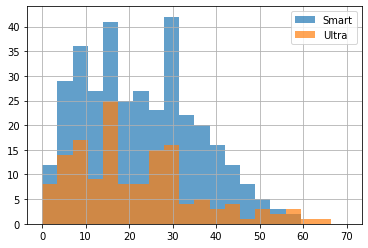

In [137]:
smart_mnth['gb_used'].hist(bins=20, range=(0, 70), alpha=0.7, label='Smart')
ultra_mnth['gb_used'].hist(bins=20, range=(0, 70), alpha=0.7, label='Ultra')
plt.legend()

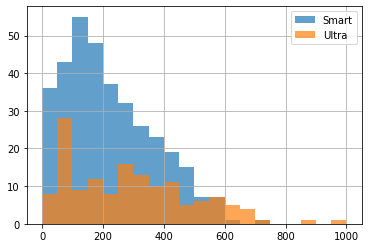

In [138]:
smart_mnth['minutes_used'].hist(bins=20, range=(0, 1000), alpha=0.7, label='Smart')
ultra_mnth['minutes_used'].hist(bins=20, range=(0, 1000), alpha=0.7, label='Ultra')
plt.legend()

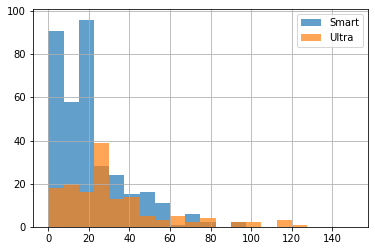

In [139]:
smart_mnth['messages'].hist(bins=20, range=(0, 150), alpha=0.7, label='Smart')
ultra_mnth['messages'].hist(bins=20, range=(0, 150), alpha=0.7, label='Ultra')
plt.legend()

### Вывод

В целом, гистаграмы расходонавия интернет-трафика и минут выглядят схоже у абонентов обоих тарифов - большая часть значений лежит в пределах до 40 ГБ и 400 минут, однако, использование интернета свыше 60 ГБ и минут свыше 800 наблюдается только у абонентов Ультра. Что касается СМС-сообщений, то для пользователей тарифа Смарт большая часть значений лежит в пределах двадцати сообщений в месяц, а для пользователей Ультра - сорока, также, значения, превышающие сотню сообщений в месяц наблюдаются только у абонентов Ультра.

## Проверка гипотез

### Нулевая гипотеза первая: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова

In [140]:
sample_1 = smart_mnth['payment']
sample_2 = ultra_mnth['payment']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.29459322878588595
Не получилось отвергнуть нулевую гипотезу


### Вывод

Хоть мы и увидели, что средние затраты пользователей разнятся (1780 у тарифа Smart и 1950 - Ultra), но высокое значение p-value (более 30%) доказывает, что значимого различия между затратами, в целом, нет. Следовательно, мы не можем отвергнуть нулевую гипотезу, которая гласит: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова.

### Нулевая гипотеза вторая: средняя выручка пользователей из Москвы аналогична выручке пользователей из других регионов

In [141]:
moscow_smart = smart_mnth.query('city == "Москва"')
reg_smart = smart_mnth.query('city != "Москва"')

display('Данные по тарифу Smart:', moscow_smart, reg_smart)
display('Отношение числа пользователей из Москвы к числу пользователей из регионов:', len(moscow_smart)/len(reg_smart))
display(moscow_smart.info(), reg_smart.info())

moscow_ultra = ultra_mnth.query('city == "Москва"')
reg_ultra = ultra_mnth.query('city != "Москва"')

display('Данные по тарифу Ultra:', moscow_ultra, reg_ultra)
display('Отношение числа пользователей из Москвы к числу пользователей из регионов:', len(moscow_ultra)/len(reg_ultra))
display(moscow_ultra.info(), reg_ultra.info())

'Данные по тарифу Smart:'

,user_id,gb_used,minutes_used,messages,tariff,city,payment
1,1001,7.0,70.0,15.0,smart,Москва,550.0
7,1007,30.0,365.0,19.0,smart,Москва,3550.0
31,1031,5.0,102.0,4.0,smart,Москва,550.0
33,1033,27.0,175.0,34.0,smart,Москва,2950.0
38,1038,10.0,80.0,2.0,smart,Москва,550.0
...,...,...,...,...,...,...,...
444,1447,15.0,207.0,18.0,smart,Москва,550.0
446,1449,18.0,267.0,45.0,smart,Москва,1150.0
447,1450,11.0,104.0,18.0,smart,Москва,550.0
478,1481,40.0,271.0,17.0,smart,Москва,5550.0


,user_id,gb_used,minutes_used,messages,tariff,city,payment
2,1002,25.0,126.0,6.0,smart,Стерлитамак,2550.0
5,1005,21.0,550.0,46.0,smart,Набережные Челны,1900.0
6,1006,34.0,292.0,15.0,smart,Ульяновск,4350.0
8,1008,3.0,28.0,5.0,smart,Челябинск,550.0
9,1009,37.0,182.0,9.0,smart,Пермь,4950.0
...,...,...,...,...,...,...,...
491,1494,17.0,162.0,15.0,smart,Омск,950.0
493,1496,58.0,499.0,39.0,smart,Вологда,9150.0
494,1497,9.0,117.0,4.0,smart,Челябинск,550.0
495,1498,16.0,108.0,14.0,smart,Владикавказ,750.0


'Отношение числа пользователей из Москвы к числу пользователей из регионов:'

0.23674911660777384

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 1 to 487
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       67 non-null     int64  
 1   gb_used       67 non-null     float64
 2   minutes_used  67 non-null     float64
 3   messages      67 non-null     float64
 4   tariff        67 non-null     object 
 5   city          67 non-null     object 
 6   payment       67 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 4.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 2 to 496
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       283 non-null    int64  
 1   gb_used       283 non-null    float64
 2   minutes_used  283 non-null    float64
 3   messages      283 non-null    float64
 4   tariff        283 non-null    object 
 5   city          283 non-null    object 


None

None

'Данные по тарифу Ultra:'

,user_id,gb_used,minutes_used,messages,tariff,city,payment
3,1003,9.0,318.0,32.0,ultra,Москва,1950.0
49,1049,13.0,490.0,25.0,ultra,Москва,1950.0
57,1057,30.0,649.0,21.0,ultra,Москва,1950.0
80,1080,4.0,316.0,25.0,ultra,Москва,1950.0
81,1081,26.0,478.0,17.0,ultra,Москва,1950.0
179,1180,57.0,79.0,16.0,ultra,Москва,6000.0
200,1201,6.0,294.0,25.0,ultra,Москва,1950.0
202,1203,13.0,427.0,23.0,ultra,Москва,1950.0
244,1245,8.0,151.0,27.0,ultra,Москва,1950.0
253,1254,29.0,348.0,25.0,ultra,Москва,1950.0


,user_id,gb_used,minutes_used,messages,tariff,city,payment
0,1000,17.0,214.0,41.0,ultra,Краснодар,1950.0
4,1004,24.0,82.0,99.0,ultra,Новокузнецк,1950.0
13,1013,5.0,78.0,4.0,ultra,Иваново,1950.0
16,1016,4.0,10.0,12.0,ultra,Омск,1950.0
18,1018,10.0,505.0,20.0,ultra,Уфа,1950.0
...,...,...,...,...,...,...,...
471,1474,11.0,169.0,15.0,ultra,Набережные Челны,1950.0
482,1485,4.0,49.0,13.0,ultra,Киров,1950.0
488,1491,26.0,385.0,36.0,ultra,Челябинск,1950.0
490,1493,9.0,62.0,8.0,ultra,Красноярск,1950.0


'Отношение числа пользователей из Москвы к числу пользователей из регионов:'

0.2782608695652174

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 3 to 473
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       32 non-null     int64  
 1   gb_used       32 non-null     float64
 2   minutes_used  32 non-null     float64
 3   messages      32 non-null     float64
 4   tariff        32 non-null     object 
 5   city          32 non-null     object 
 6   payment       32 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 492
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       115 non-null    int64  
 1   gb_used       115 non-null    float64
 2   minutes_used  115 non-null    float64
 3   messages      115 non-null    float64
 4   tariff        115 non-null    object 
 5   city          115 non-null    object 


None

None

Занятно, что среди пользователей тарифа Ultra доля москвичей больше (27,8% против 23,6%).

In [142]:
sample_1 = moscow_smart['payment']
sample_2 = reg_smart['payment']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16862721909858217
Не получилось отвергнуть нулевую гипотезу


In [143]:
sample_1 = moscow_ultra['payment']
sample_2 = reg_ultra['payment']

alpha = .05

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26392228042518634
Не получилось отвергнуть нулевую гипотезу


### Вывод

Как мы видим, значения p-value также достаточно высоки, поэтому и вторую нулевую гипотезу о том, что средняя выручка пользователей из Москвы аналогична выручке пользователей из других регионов, мы не можем отвергнуть.

## Итог

Итак, в результате проделаной работы мы получили следующие данные:
* около 70% абонентов Мегалайн продпочитают тариф Смарт
* всего 7,6% пользователей из выборки сменили тариф за 2018 год
* потребности пользователей тарифа Смарт зачастую сильно превышают лимиты - и абоненты вынуждены переплачивать, отдавая сумму, которая, в среднем, примерно в три раза больше платы за сам тариф. Однако, данная сумма (1780) все равно меньше платы за тариф Ультра (1950) - и, видимо, этим и мотивировано желание абонентов оставаться на Смарте
* гистаграмы расходонавия интернет-трафика и минут выглядят схоже у абонентов обоих тарифов - большая часть значений лежит в пределах до 40 ГБ и 400 минут, однако, использование интернета свыше 60 ГБ и минут свыше 800 наблюдается только у абонентов Ультра; что касается СМС-сообщений, то для пользователей тарифа Смарт большая часть значений лежит в пределах двадцати сообщений в месяц, а для пользователей Ультра - сорока, также, значения, превышающие сотню сообщений в месяц наблюдаются только у абонентов Ультра
* среди пользователей тарифа Ультра доля москвичей больше, чем среди пользователей Смарт (27,8% против 23,6%)
* мы увидели, что средние затраты пользователей разнятся (1780 у тарифа Смарт и 1950 - Ультра), но высокое значение p-value (более 30%) доказывает, что значимого различия между затратами, в целом, нет. Следовательно, мы не можем отвергнуть нулевую гипотезу, которая гласит: средняя выручка пользователей тарифов Ультра и Смарт одинакова
* также, и при работе над второй гипотезой мы видим, что значения p-value достаточно высоки, поэтому и вторую нулевую гипотезу о том, что средняя выручка пользователей из Москвы аналогична выручке пользователей из других регионов, мы не можем отвергнуть